1.编写 Python程序,判断输入a是否为质数

In [20]:
def prime(n):
    if n==1:
        return 0
    for i in range(2,n+1):
        s=n%i
        if s==0:
            break
    if i==n:
        return 1
    else:
        return 0
        
print("请输入一个数：")
a=int(input())
print("a=",a)
if prime(a):
    print(f"{a}是质数")
else:
    print(f"{a}不是质数")

请输入一个数：
a= 256
256不是质数


2.用Python实现插入排序该算法，不允许直接调用插入排序函数，需要手动实现其逻辑过程。

In [13]:
def Insertion_Sort(A):
    for j in range(1,len(A)):
        key=A[j]
        i=j-1
        while i>=0 and A[i]>key:
            A[i+1]=A[i]
            i=i-1
        A[i+1]=key
    return A

A=[5,2,4,6,1,3]
print(A)
print("插入排序结果：")
print(Insertion_Sort(A))

[5, 2, 4, 6, 1, 3]
插入排序结果：
[1, 2, 3, 4, 5, 6]


3.用Python实现选择排序该算法，不允许直接调用插入排序函数，需要手动实现其逻辑过程。

In [14]:
def Select_Sort(A):
    for j in range(0,len(A)):
        min=A[j]
        mindex=j
        for i in range(j+1,len(A)):
            if A[i]<min:
                min=A[i]
                mindex=i
        tmp=A[j]
        A[j]=A[mindex]
        A[mindex]=tmp
    return A

A=[5,2,4,6,1,3]
print(A)
print("选择排序结果：")
print(Select_Sort(A))

[5, 2, 4, 6, 1, 3]
选择排序结果：
[1, 2, 3, 4, 5, 6]


4.用Python实现快速排序该算法，不允许直接调用插入排序函数，需要手动实现其逻辑过程。

In [21]:
def Partition(A,p,r):
    x=A[r]
    i=p-1
    for j in range(p,r):
        if A[j]<=x:
            i=i+1
            tmp=A[i]
            A[i]=A[j]
            A[j]=tmp
    tmp=A[i+1]
    A[i+1]=A[r]
    A[r]=tmp
    return i+1

def QuickSort(A,p,r):
    if p<r:
        q=Partition(A,p,r)
        QuickSort(A,p,q-1)
        QuickSort(A,q+1,r)
    return A

A=[5,2,4,6,1,3]
print(A)
print("快速排序结果：")
print(QuickSort(A,0,len(A)-1))


[5, 2, 4, 6, 1, 3]
快速排序结果：
[1, 2, 3, 4, 5, 6]


5.使用 Python 随机生成三组长度递增的随机数列，长度分别为100、1000、10000，对生成的随机数组使用不同的排序算法，例如选择排序和归并排序，至少三种排序方法。对这些数列的数据排序，并分析不同排序算法在不同长度数列下的运行效果，例如运行时间等指标。

In [21]:
import random

def GenerateList():
    L100=[random.randint(1,100) for _ in range(100)]
    L1000=[random.randint(1,1000) for _ in range(1000)]
    L10000=[random.randint(1,10000) for _ in range(10000)]
    return L100,L1000,L10000

L100,L1000,L10000=GenerateList()
# print(f"长度为100的数列：{L100}")
# print(f"长度为1000的数列：{L1000}")
# print(f"长度为10000的数列：{L10000}")

In [22]:
import timeit
from functools import partial

def CompareTime(L100,L1000,L10000):
    for sort_func in [Insertion_Sort,Select_Sort,QuickSort]:
        for lst,size in [(L100,100),(L1000,1000),(L10000,10000)]:
            if sort_func.__name__=='QuickSort':
                time=timeit.timeit(partial(sort_func,lst.copy(),0,len(lst)-1),number=1)
            else:
                time=timeit.timeit(lambda:sort_func(lst.copy()),number=1)
            print(f"{sort_func.__name__}排序长度为{size}的数组耗时：{time}")
            
CompareTime(L100,L1000,L10000)

Insertion_Sort排序长度为100的数组耗时：0.0004693000000770553
Insertion_Sort排序长度为1000的数组耗时：0.05142309999973804
Insertion_Sort排序长度为10000的数组耗时：4.52357209999991
Select_Sort排序长度为100的数组耗时：0.0003310000001874869
Select_Sort排序长度为1000的数组耗时：0.030860800000482413
Select_Sort排序长度为10000的数组耗时：3.1166200999996363
QuickSort排序长度为100的数组耗时：0.0002792000004774309
QuickSort排序长度为1000的数组耗时：0.0027343000001565088
QuickSort排序长度为10000的数组耗时：0.038430699999480566


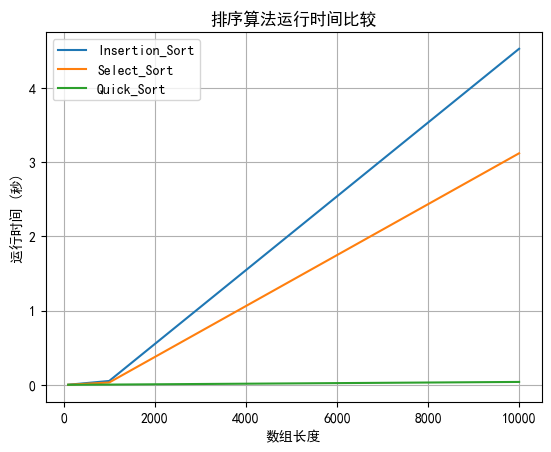

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def plot(algorithm,time100,time1000,time10000):
    sizes=[100,1000,10000]
    for i,sort_func in enumerate(algorithm):
        plt.plot(sizes,[time100[i],time1000[i],time10000[i]],label=sort_func)
        
    plt.xlabel('数组长度')
    plt.ylabel('运行时间 (秒)')
    plt.title('排序算法运行时间比较')
    plt.legend()
    plt.grid(True)
    plt.show()

# 排序算法名称
sorting_algorithms = ['Insertion_Sort', 'Select_Sort', 'Quick_Sort']

# 对应的运行时间数据
times_100 = [0.0004693000000770553, 0.0003310000001874869, 0.0002792000004774309]
times_1000 = [0.05142309999973804, 0.030860800000482413, 0.0027343000001565088]
times_10000 = [4.52357209999991, 3.1166200999996363, 0.038430699999480566]

# 调用绘图函数
plot(sorting_algorithms, times_100, times_1000, times_10000)

6.使用python代码获取当前系统时间

In [15]:
from datetime import datetime

current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f"当前系统时间是：{current_time}")

当前系统时间是：2024-10-15 23:08:40


7.homework/data文件夹下的stuGrade.csv文件中包含5位同学的学号、语文成绩、数学成绩和英语成绩，请先用记事本打开该文件，查看文件内容，然后编写Python程序，读取该文件，并计算出各科的平均成绩（保留2位小数）。

In [4]:
import os

current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'hw3', 'stuGrade.txt')
with open(file_path,'r') as file:
    #content=file.read()
    lines=file.readlines()
#print(content)
print(lines)


['stuID,chinese,math,english\n', '10381,74,87,82\n', '10382,92,88,90\n', '10383,87,82,81\n', '10384,98,97,96\n', '10385,62,51,60\n']


In [5]:
headers=lines[0].strip().split(',')[1:]
scores={header:[] for header in headers}

for line in lines[1:]:
    data=line.strip().split(',')
    for i,score in enumerate(data[1:]):
        scores[headers[i]].append(int(score))

averages={header: sum(scores[header])/len(scores[header]) for header in headers}

for subject,average in averages.items():
    print(f"{subject}的平均成绩是：{average:.2f}")

chinese的平均成绩是：82.60
math的平均成绩是：81.00
english的平均成绩是：81.80


8.请在第7题的代码继续编写Python程序，将以下内容写入my.txt文件中，一并上传到github中。

第1行：你的学号和姓名

第2行：3门课程的平均成绩（任意课程），保留2位小数，以英文逗号间隔

第3行：系统当前时间，格式例如2020-01-01 12:00:00

第4行：两秒后的系统当前时间（利用sleep()方法）

In [16]:
import time
output_path= os.path.join(current_dir, 'hw3','my.txt')
id=str(10222140442)
name="吴彤"
with open(output_path,'w',encoding='utf-8') as file:
    file.write(id+","+name+"\n")
    for subject,average in averages.items():
        if subject!="english":
            file.write(f"{subject}{average:.2f},")
        else:
            file.write(f"{subject}{average:.2f}\n")
    current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    file.write(f"系统当前时间：{current_time}\n")
    time.sleep(2)
    new_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    file.write(f"两秒后的系统当前时间：{new_time}")
print(f"结果已写入{output_path}")

结果已写入D:\Learning\Microsoft VS Code\VSCode-win32-x64-1.94.0\hw3\my.txt
